# Load Dataset

In [2]:
import pandas as pd

data = pd.read_csv("amazon_reviews.csv", header=None, names=["polarity", "title", "text"])

print(data.head())
print(data.info())

   polarity                                              title  \
0         2                     Stuning even for the non-gamer   
1         2              The best soundtrack ever to anything.   
2         2                                           Amazing!   
3         2                               Excellent Soundtrack   
4         2  Remember, Pull Your Jaw Off The Floor After He...   

                                                text  
0  This sound track was beautiful! It paints the ...  
1  I'm reading a lot of reviews saying that this ...  
2  This soundtrack is my favorite music of all ti...  
3  I truly like this soundtrack and I enjoy video...  
4  If you've played the game, you know how divine...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600000 entries, 0 to 3599999
Data columns (total 3 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   polarity  int64 
 1   title     object
 2   text      object
dtypes: int64(1), object(2)
memory usage: 82.4+ MB


# Handle Missing Values

In [3]:
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

data = data.dropna(subset=['text'])

print(data.info())

Missing Values:
 polarity      0
title       207
text          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600000 entries, 0 to 3599999
Data columns (total 3 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   polarity  int64 
 1   title     object
 2   text      object
dtypes: int64(1), object(2)
memory usage: 82.4+ MB
None


# Exploratory Data Analysis (EDA)

## Sentiment Distribution

/var/folders/7x/www0tghn2ys9qh9dy55y17280000gn/T/ipykernel_927/718671873.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=data, palette='viridis')


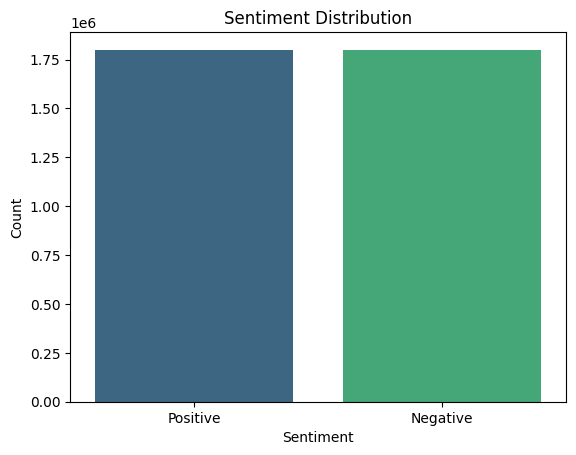

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

data['sentiment'] = data['polarity'].map({1: 'Negative', 2: 'Positive'})

sns.countplot(x='sentiment', data=data, palette='viridis')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

## Review Length Analysis

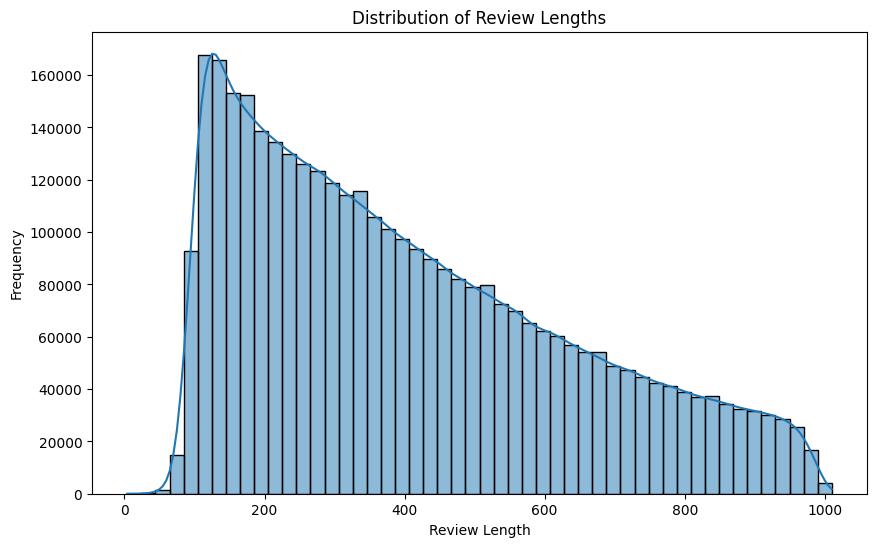

In [5]:
data['review_length'] = data['text'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(data['review_length'], bins=50, kde=True)
plt.title("Distribution of Review Lengths")
plt.xlabel("Review Length")
plt.ylabel("Frequency")
plt.show()

## Word Cloud

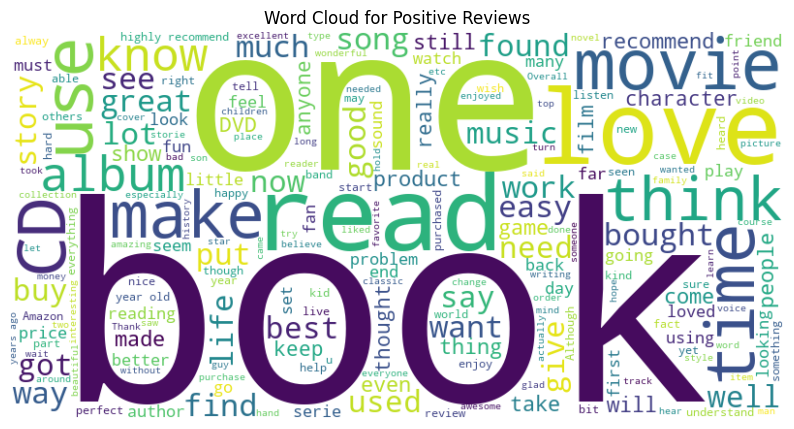

In [6]:
from wordcloud import WordCloud

positive_reviews = " ".join(data[data['polarity'] == 2]['text'])
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Positive Reviews")
plt.show()

# Preprocessing

## Clean Text Data

In [7]:
import pandas as pd
import re
from nltk.corpus import stopwords

import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def clean_text_optimized(text):
    try:
        text = re.sub(r'[^a-zA-Z\s]', '', text.lower())

        tokens = text.split()  # Use split() instead of word_tokenize for speed
        cleaned_tokens = [word for word in tokens if word not in stop_words]

        return ' '.join(cleaned_tokens)
    except Exception as e:
        print(f"Error cleaning text: {e}")
        return ""

data = pd.read_csv("amazon_reviews.csv", header=None, names=["polarity", "title", "text"])

data = data.dropna(subset=['text'])

data['cleaned_text'] = data['text'].apply(clean_text_optimized)

print(data[['text', 'cleaned_text']].head())

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/krushalkalkani/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                text  \
0  This sound track was beautiful! It paints the ...   
1  I'm reading a lot of reviews saying that this ...   
2  This soundtrack is my favorite music of all ti...   
3  I truly like this soundtrack and I enjoy video...   
4  If you've played the game, you know how divine...   

                                        cleaned_text  
0  sound track beautiful paints senery mind well ...  
1  im reading lot reviews saying best game soundt...  
2  soundtrack favorite music time hands intense s...  
3  truly like soundtrack enjoy video game music p...  
4  youve played game know divine music every sing...  


## Vectorize Text

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=1000)
X = tfidf.fit_transform(data['cleaned_text']).toarray()

y = data['polarity']

# Model Building

## Train Logistic Regression

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import scipy.sparse as sp
import numpy as np
import time

tfidf = TfidfVectorizer(max_features=100)  
X = tfidf.fit_transform(data['cleaned_text'])  
y = data['polarity'].values  

subset_size = 100  
X = X[:subset_size]
y = y[:subset_size]

start_time = time.time() 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train-Test Split Completed in {time.time() - start_time:.2f} seconds")

print(f"X_train Shape: {X_train.shape}")
print(f"X_test Shape: {X_test.shape}")
print(f"y_train Shape: {len(y_train)}")
print(f"y_test Shape: {len(y_test)}")

Train-Test Split Completed in 0.02 seconds
X_train Shape: (80, 100)
X_test Shape: (20, 100)
y_train Shape: 80
y_test Shape: 20


Logistic Regression Results:
Accuracy: 0.80

Classification Report:
              precision    recall  f1-score   support

           1       0.83      0.62      0.71         8
           2       0.79      0.92      0.85        12

    accuracy                           0.80        20
   macro avg       0.81      0.77      0.78        20
weighted avg       0.80      0.80      0.79        20



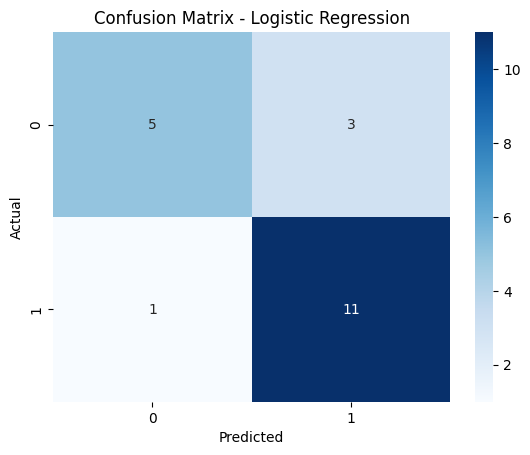

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

logistic_model = LogisticRegression(max_iter=200)
logistic_model.fit(X_train, y_train)

y_pred_logistic = logistic_model.predict(X_test)

print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logistic):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_logistic))

cm_logistic = confusion_matrix(y_test, y_pred_logistic)
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Confusion Matrix

Accuracy: 0.8441902777777778

Classification Report:
               precision    recall  f1-score   support

           1       0.85      0.84      0.84    359759
           2       0.84      0.85      0.84    360241

    accuracy                           0.84    720000
   macro avg       0.84      0.84      0.84    720000
weighted avg       0.84      0.84      0.84    720000



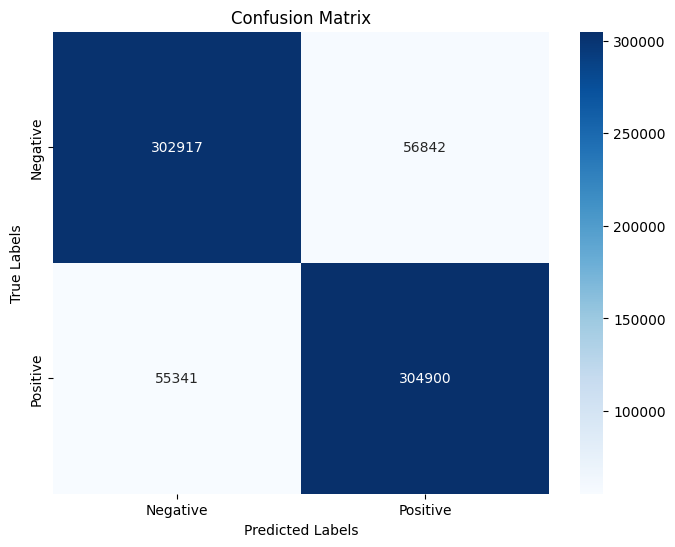

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("amazon_reviews.csv", header=None, names=["polarity", "title", "text"])
data = data.dropna(subset=['text'])
data['cleaned_text'] = data['text'].str.lower().str.replace(r'[^a-z\s]', '', regex=True)

tfidf = TfidfVectorizer(max_features=1000)  
X = tfidf.fit_transform(data['cleaned_text'])
y = data['polarity'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic_model = LogisticRegression(max_iter=200)
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Hyperparameter Tuning


Accuracy: 0.8124013888888889

Classification Report:
               precision    recall  f1-score   support

           1       0.81      0.81      0.81    359759
           2       0.81      0.81      0.81    360241

    accuracy                           0.81    720000
   macro avg       0.81      0.81      0.81    720000
weighted avg       0.81      0.81      0.81    720000



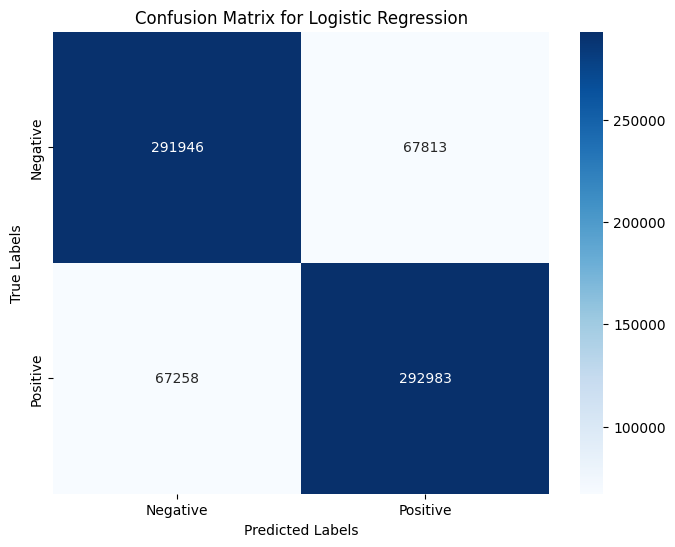

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

subset_size = 5000  
X_train_sample = X_train[:subset_size]
y_train_sample = y_train[:subset_size]

best_C = 1  
max_iter = 100  

logistic_model = LogisticRegression(C=best_C, solver='liblinear', max_iter=max_iter)
logistic_model.fit(X_train_sample, y_train_sample)

y_pred = logistic_model.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Insights and Recommendations

Model Performance Summary:

Accuracy: 0.8124013888888889

Classification Report:
               precision    recall  f1-score   support

           1       0.81      0.81      0.81    359759
           2       0.81      0.81      0.81    360241

    accuracy                           0.81    720000
   macro avg       0.81      0.81      0.81    720000
weighted avg       0.81      0.81      0.81    720000


Confusion Matrix Details:
True Negatives (Correctly Predicted Negative): 291946
False Positives (Incorrectly Predicted Positive): 67813
False Negatives (Incorrectly Predicted Negative): 67258
True Positives (Correctly Predicted Positive): 292983

Key Insights:
- 292983 positive reviews were correctly identified as positive.
- 291946 negative reviews were correctly identified as negative.
- 67813 negative reviews were incorrectly classified as positive.
- 67258 positive reviews were incorrectly classified as negative.

Recommendations:
- Consider improving the model by fine-tuning hyp

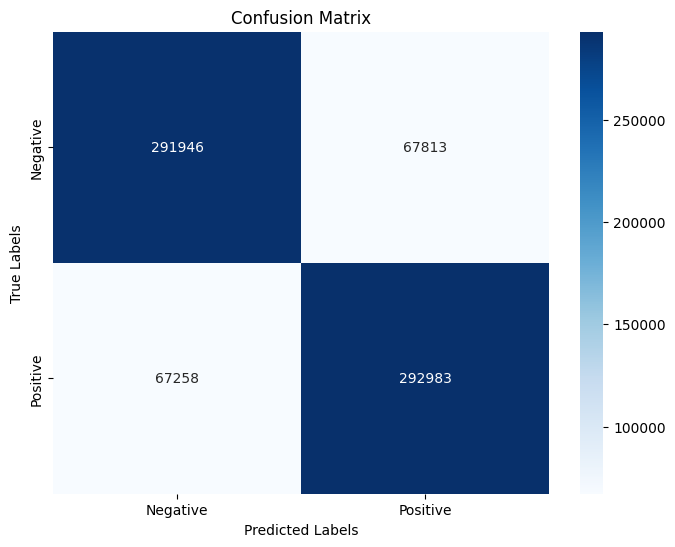

In [5]:
# Import necessary libraries
from sklearn.metrics import classification_report, confusion_matrix

# 1. Evaluate Model Performance
print("Model Performance Summary:\n")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 2. Confusion Matrix Insights
cm = confusion_matrix(y_test, y_pred)
true_negatives, false_positives, false_negatives, true_positives = cm.ravel()

print("\nConfusion Matrix Details:")
print(f"True Negatives (Correctly Predicted Negative): {true_negatives}")
print(f"False Positives (Incorrectly Predicted Positive): {false_positives}")
print(f"False Negatives (Incorrectly Predicted Negative): {false_negatives}")
print(f"True Positives (Correctly Predicted Positive): {true_positives}")

# 3. Key Insights
print("\nKey Insights:")
print(f"- {true_positives} positive reviews were correctly identified as positive.")
print(f"- {true_negatives} negative reviews were correctly identified as negative.")
print(f"- {false_positives} negative reviews were incorrectly classified as positive.")
print(f"- {false_negatives} positive reviews were incorrectly classified as negative.")

# 4. Recommendations
print("\nRecommendations:")
if false_positives > 0 or false_negatives > 0:
    print("- Consider improving the model by fine-tuning hyperparameters.")
    print("- Focus on reducing false positives and false negatives to improve precision and recall.")
    print("- Explore additional features or advanced models like Random Forest or Gradient Boosting for better results.")
else:
    print("- The model performs exceptionally well; maintain current settings!")
print("- Use this model to analyze customer reviews and take action on negative feedback.")

# 5. Visualize Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()